In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pyaurorax

aurorax = pyaurorax.PyAuroraX()

# TREx-ATM Forward Calculation with custom spectrum supplied

Building off the basic TREx-ATM forward example, we can also perform calculations by supplying a custom spectrum. Below, we'll do this using some example spectrum data. Note that the energy and flux arrays must be the same length, and energy and flux values are expected to be floats in eV and 1/cm2/sr/eV, respectively.

In [2]:
# two arrays that we'll merge into a Nx2 numpy array, representing energy and flux.
custom_spectrum_energy = [
    1.25000, 1.75000, 2.25000, 2.75000, 3.25000, 3.75000, 4.25000, 4.75000, 5.25000, 5.75000, 6.25000, 6.75000, 7.25000, 7.75000,
    8.25000, 8.75000, 9.25000, 9.75000, 10.2500, 10.7616, 11.3058, 11.8854, 12.4948, 13.1354, 13.8089, 14.5169, 15.2612, 16.0436,
    16.8662, 17.7310, 18.6401, 19.5957, 20.6004, 21.6566, 22.7670, 23.9343, 25.1614, 26.4515, 27.8077, 29.2334, 30.7322, 32.3079,
    33.9644, 35.7058, 37.5365, 39.4610, 41.4842, 43.6111, 45.8471, 48.1978, 50.6689, 53.2668, 55.9978, 58.8689, 61.8871, 65.0602,
    68.3959, 71.9026, 75.5891, 79.4647, 83.5389, 87.8221, 92.3248, 97.0584, 102.035, 107.266, 112.766, 118.547, 124.625, 131.015,
    137.732, 144.794, 152.218, 160.022, 168.227, 176.852, 185.919, 195.452, 205.473, 216.007, 227.082, 238.725, 250.965, 263.832,
    277.359, 291.579, 306.529, 322.245, 338.767, 356.136, 374.395, 393.591, 413.771, 434.985, 457.288, 480.733, 505.381, 531.292,
    558.532, 587.169, 617.274, 648.922, 682.193, 717.170, 753.940, 792.595, 833.232, 875.953, 920.864, 968.078, 1017.71, 1069.89,
    1124.75, 1182.41, 1243.04, 1306.77, 1373.77, 1444.20, 1518.25, 1596.09, 1677.92, 1763.95, 1854.39, 1949.47, 2049.42, 2154.50,
    2264.96, 2381.09, 2503.17, 2631.51, 2766.43, 2908.27, 3057.38, 3214.13, 3378.93, 3552.17, 3734.29, 3925.75, 4127.03, 4338.63,
    4561.07, 4794.92, 5040.76, 5299.21, 5570.91, 5856.53, 6156.80, 6472.47, 6804.32, 7153.18, 7519.93, 7905.49, 8310.81, 8736.92,
    9184.87, 9655.7
]
custom_spectrum_flux = [
    14237.8, 19932.9, 25628.1, 31323.2, 37018.3, 42713.4, 48408.6, 54103.7, 59798.8, 65493.9, 71189.1, 76884.2, 82579.3, 88274.4,
    93969.6, 99664.7, 105360.0, 111055.0, 116750.0, 122577.0, 128775.0, 135378.0, 142319.0, 149616.0, 157287.0, 165351.0, 173829.0,
    182741.0, 192110.0, 201960.0, 212315.0, 223200.0, 234644.0, 246675.0, 259322.0, 272618.0, 286595.0, 301289.0, 316737.0, 332976.0,
    350048.0, 367995.0, 386863.0, 406698.0, 427550.0, 449471.0, 472515.0, 496742.0, 522210.0, 548985.0, 577132.0, 606722.0, 637829.0,
    670531.0, 704910.0, 741052.0, 779046.0, 818989.0, 860979.0, 905122.0, 951529.0, 1.00032e+06, 1.05160e+06, 1.10552e+06,
    1.14681e+06, 1.16681e+06, 1.18332e+06, 1.19597e+06, 1.20452e+06, 1.21134e+06, 1.21518e+06, 1.21786e+06, 1.21958e+06, 1.22031e+06,
    1.21912e+06, 1.21596e+06, 1.21029e+06, 1.20159e+06, 1.18984e+06, 1.17542e+06, 1.15883e+06, 1.14056e+06, 1.12111e+06, 1.10084e+06,
    1.07960e+06, 1.05717e+06, 1.03333e+06, 1.00787e+06, 980597.0, 951507.0, 920731.0, 888359.0, 854453.0, 819049.0, 782220.0,
    744214.0, 705369.0, 665934.0, 626276.0, 586707.0, 547469.0, 508787.0, 470923.0, 434073.0, 398475.0, 364314.0, 331712.0, 300753.0,
    271519.0, 244145.0, 218704.0, 195202.0, 173623.0, 153886.0, 135967.0, 119819.0, 105375.0, 92493.0, 81018.5, 70809.4, 61716.9,
    53608.8, 46394.7, 40017.3, 34425.8, 29569.1, 25398.0, 21855.1, 18852.0, 16295.5, 14096.6, 12167.9, 10429.6, 8852.41, 7439.90,
    6196.57, 5126.73, 4235.10, 3517.08, 2944.53, 2486.98, 2115.25, 1801.38, 1520.12, 1263.38, 1033.71, 833.682, 665.821, 532.604,
    433.682, 362.035, 310.022, 270.400, 236.311, 201.652, 165.385
]
custom_spectrum_arr = np.empty((len(custom_spectrum_energy), 2), dtype=np.float64)
custom_spectrum_arr[:, 0] = np.asarray(custom_spectrum_energy)[:]
custom_spectrum_arr[:, 1] = np.asarray(custom_spectrum_flux)[:]

In [8]:
# set parameters
timestamp = datetime.datetime(2021, 11, 4, 6, 0, 0)
latitude = 58.227808
longitude = -103.680631

# set output flags
output = pyaurorax.models.ATMForwardOutputFlags()
output.set_all_true()

# run model
result = aurorax.models.atm.forward(timestamp, latitude, longitude, output, custom_spectrum=custom_spectrum_arr)

# show results
result.pretty_print()

ATMForwardResult:
  altitudes                            : array([ 80. ,  81. ,  82. ,  83. ,  84. ,  85. ,  86. ,  87. ...])
  emission_1304                        : array([2.08780552e-17, 4.17117570e-17, 2.10952007e-16, 7.634 ...])
  emission_1356                        : array([3.32336272e-18, 6.95347048e-18, 3.51735659e-17, 1.271 ...])
  emission_4278                        : array([1.79085398e-13, 1.35183992e-13, 2.58748968e-13, 3.520 ...])
  emission_5577                        : array([9.44379135e-05, 9.63945233e-04, 1.18129449e-02, 1.429 ...])
  emission_6300                        : array([5.33308864e-08, 6.83923886e-08, 1.04064611e-07, 3.837 ...])
  emission_8446                        : array([7.62046922e-18, 1.53571275e-17, 7.76775469e-17, 2.809 ...])
  emission_lbh                         : array([9.68854012e-13, 8.21176840e-13, 1.57183522e-12, 2.138 ...])
  height_integrated_rayleighs_1304     : 613.622900
  height_integrated_rayleighs_1356     : 106.755412
  height_integ

Height-integrated Rayleighs:
  427.8nm:  166.05 R
  557.7nm:  1156.16 R
  630.0nm:  775.82 R
  844.6nm:  235.34 R
  LBH:      1074.34 R
  130.4nm:  613.62 R
  135.6nm:  106.76 R


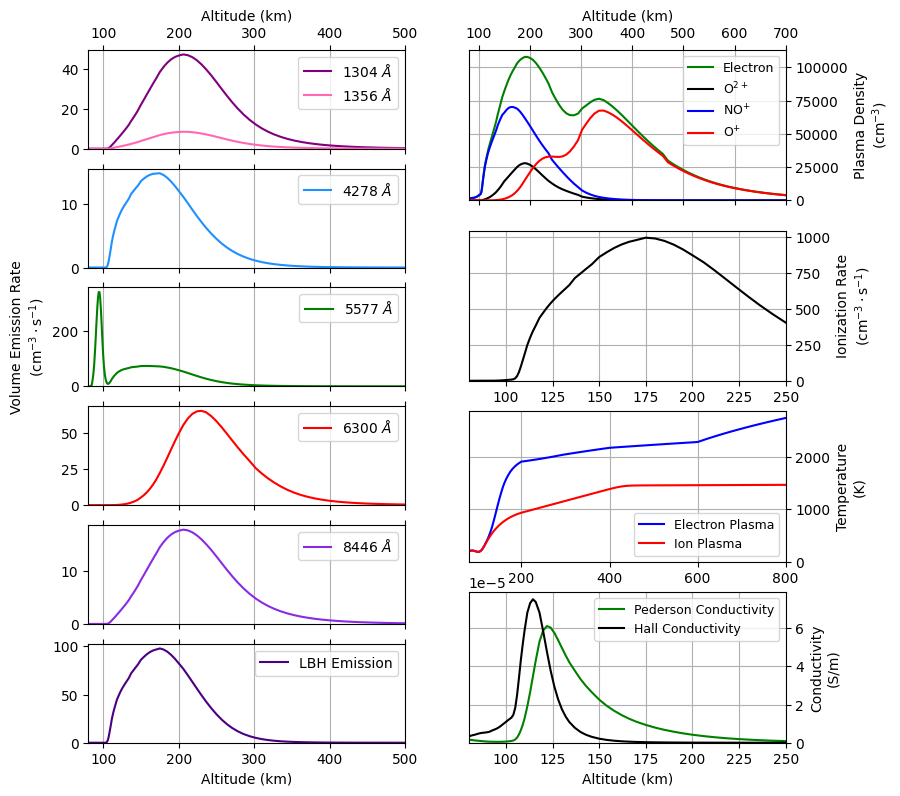

In [9]:
# now let's have a closer look at everything we got back
#
# print all height-integrated Rayleighs data
print("""Height-integrated Rayleighs:
  427.8nm:  %.02f R
  557.7nm:  %.02f R
  630.0nm:  %.02f R
  844.6nm:  %.02f R
  LBH:      %.02f R
  130.4nm:  %.02f R
  135.6nm:  %.02f R""" % (result.height_integrated_rayleighs_4278,
                          result.height_integrated_rayleighs_5577,
                          result.height_integrated_rayleighs_6300,
                          result.height_integrated_rayleighs_8446,
                          result.height_integrated_rayleighs_lbh,
                          result.height_integrated_rayleighs_1304,
                          result.height_integrated_rayleighs_1356))

# plot the emission, plasma, and neutral data
#
# we'll do this all in one plot, but made up from many subplots
alt = result.altitudes
fig = plt.figure(figsize=(9,9))

# plot all the emissions as a column of subplots
# 
# 1304 A & 1356 A emission
ax1 = fig.add_subplot(6,2,1)
ax1.plot(alt, result.emission_1304, label=r"1304 $\AA$", color="purple")
ax1.plot(alt, result.emission_1356, label=r"1356 $\AA$", color="hotpink")
ax1.legend()
ax1.set_xlim(80,500)
ax1.set_ylim(bottom=0)
ax1.grid(axis="x")
ax1.set_xlabel("Altitude (km)", va="bottom")
ax1.tick_params(axis="x", bottom=True, top=True, labeltop=True, labelbottom=False)
ax1.xaxis.set_label_position("top")

# blueline emission
ax2 = fig.add_subplot(6,2,3)
ax2.plot(alt, result.emission_4278, label=r"4278 $\AA$", color="dodgerblue")
ax2.legend()
ax2.set_xlim(80,500)
ax2.set_ylim(bottom=0)
ax2.grid(axis="x")
ax2.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# greenline emission
ax3 = fig.add_subplot(6,2,5)
ax3.plot(alt, result.emission_5577, label=r"5577 $\AA$", color="green")
ax3.legend()
ax3.set_xlim(80,500)
ax3.set_ylim(bottom=0)
ax3.grid(axis="x")
ax3.set_ylabel("Volume Emission Rate\n(cm$^{-3} \cdot $s$^{-1}$)")
ax3.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# redline emission
ax4 = fig.add_subplot(6,2,7)
ax4.plot(alt, result.emission_6300, label=r"6300 $\AA$", color="red")
ax4.legend()
ax4.set_xlim(80,500)
ax4.set_ylim(bottom=0)
ax4.grid(axis="x")
ax4.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# near-infrared 8446 A emission
ax5 = fig.add_subplot(6,2,9)
ax5.plot(alt, result.emission_8446, label=r"8446 $\AA$", color="blueviolet")
ax5.legend()
ax5.set_xlim(80,500)
ax5.set_ylim(bottom=0)
ax5.grid(axis="x")
ax5.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# Lyman-Birge-Hopfield emission
ax6 = fig.add_subplot(6,2,11)
ax6.plot(alt, result.emission_lbh, label="LBH Emission", color="indigo")
ax6.legend()
ax6.set_xlim(80,500)
ax6.set_ylim(bottom=0)
ax6.grid(axis="x")
ax6.set_xlabel("Altitude (km)")
ax6.tick_params(axis="x", bottom=True, top=True)

# plot the plasma data as a second column of subplots
#
# plasma density
ax7 = fig.add_subplot(4,2,2)
ax7.plot(alt, result.plasma_electron_density, label="Electron", color="green")
ax7.plot(alt, result.plasma_o2plus_density, label="O$^{2+}$", color="black")
ax7.plot(alt, result.plasma_noplus_density, label="NO$^{+}$", color="blue")
ax7.plot(alt, result.plasma_oplus_density, label="O$^{+}$", color="red")
ax7.grid()
ax7.set_ylabel("Plasma Density\n(cm$^{-3}$)")
ax7.legend(fontsize=9)
ax7.set_xlim(80,700)
ax7.set_ylim(bottom=0)
ax7.tick_params(axis="x", bottom=True, top=True, labeltop=True, labelbottom=False)
ax7.set_xlabel("Altitude (km)")
ax7.xaxis.set_label_position("top")
ax7.yaxis.set_label_position("right")
ax7.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma ionisation rate
ax8 = fig.add_subplot(4,2,4)
ax8.plot(alt, result.plasma_ionisation_rate, color="black")
ax8.grid()
ax8.set_ylabel("Ionization Rate\n(cm$^{-3} \cdot $s$^{-1}$)")
ax8.set_xlim(80,250)
ax8.set_ylim(bottom=0)
ax8.yaxis.set_label_position("right")
ax8.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma temperatures
ax9 = fig.add_subplot(4,2,6)
ax9.plot(alt, result.plasma_electron_temperature, label="Electron Plasma", color="blue")
ax9.plot(alt, result.plasma_ion_temperature, label="Ion Plasma", color="red")
ax9.grid()
ax9.legend(fontsize=9)
ax9.set_ylabel("Temperature\n(K)")
ax9.set_xlim(80,800)
ax9.set_ylim(bottom=0)
ax9.yaxis.set_label_position("right")
ax9.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma conductivities
ax10 = fig.add_subplot(4,2,8)
ax10.plot(alt, result.plasma_pederson_conductivity, label="Pederson Conductivity", color="green")
ax10.plot(alt, result.plasma_hall_conductivity, label="Hall Conductivity", color="black")
ax10.grid()
ax10.legend(fontsize=9)
ax10.set_ylabel("Conductivity\n(S/m)")
ax10.set_xlim(80,250)
ax10.set_ylim(bottom=0)
ax10.set_xlabel("Altitude (km)")
ax10.yaxis.set_label_position("right")
ax10.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# render the plot
plt.show()